In [2]:
import gym


env = gym.make("CliffWalking-v0")



n_state = env.observation_space.n
print(n_state)
n_action = env.action_space.n
print(n_action)


env.reset()

env.render()


new_state, reward, is_done, info = env.step(2)
env.render()

print(new_state)
print(reward)
print(is_done)
print(info)



new_state, reward, is_done, info = env.step(0)
env.render()


print(new_state)
print(reward)




new_state, reward, is_done, info = env.step(1)
new_state, reward, is_done, info = env.step(2)
env.render()
print(new_state)
print(reward)
print(is_done)



new_state, reward, is_done, info = env.step(0)
for _ in range(11):
    env.step(1)
new_state, reward, is_done, info = env.step(2)
env.render()


print(new_state)
print(reward)
print(is_done)




48
4
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

36
-1
False
{'prob': 1.0}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

24
-1
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

36
-100
False
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

47
-1
True
The optimal policy:
 {36: 0, 24: 1, 25: 1, 12: 1, 13: 1, 0: 1, 26: 1, 14: 1, 1: 3, 27: 1, 15: 1, 2: 1, 3: 2, 28: 1, 16: 2, 4: 1, 29: 1, 30: 1, 17: 1, 5: 1, 18: 2, 6: 1, 31: 1, 19: 2, 7: 1, 32: 1, 20: 1, 8: 1, 33: 1, 21: 2, 9: 2, 34: 

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

The optimal policy:
 {36: 0, 24: 1, 25: 1, 12: 1, 13: 1, 0: 1, 26: 1, 14: 2, 1: 0, 27: 1, 2: 1, 15: 2, 3: 1, 28: 1, 16: 1, 4: 1, 29: 1, 17: 2, 5: 3, 30: 1, 18: 1, 6: 1, 31: 1, 19: 1, 7: 1, 8: 1, 20: 2, 32: 1, 33: 1, 21: 1, 9: 2, 22: 1, 10: 1, 34: 1, 23: 2, 11: 2, 35: 2, 47: 3}


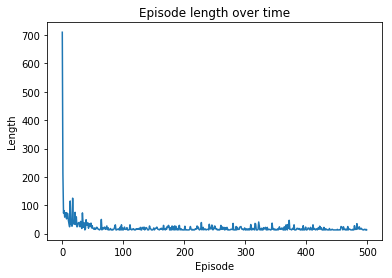

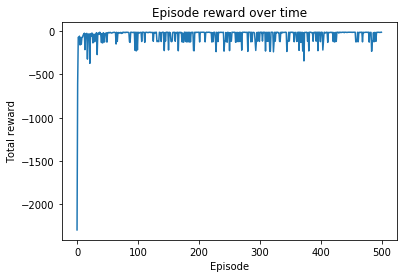

In [3]:
import torch
import gym

env = gym.make('CliffWalking-v0')


def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        best_action = torch.argmax(Q[state]).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function


from collections import defaultdict



def q_learning(env, gamma, n_episode, alpha):
    """
    Obtain the optimal policy with off-policy Q-learning method
    @param env: OpenAI Gym environment
    @param gamma: discount factor
    @param n_episode: number of episodes
    @return: the optimal Q-function, and the optimal policy
    """
    n_action = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_action))
    for episode in range(n_episode):
        state = env.reset()
        is_done = False
        while not is_done:

            action = epsilon_greedy_policy(state, Q)
            next_state, reward, is_done, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
            Q[state][action] += alpha * td_delta

            length_episode[episode] += 1
            total_reward_episode[episode] += reward

            if is_done:
                break
            state = next_state

    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

gamma = 1

n_episode = 500

alpha = 0.4

epsilon = 0.1

epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

optimal_Q, optimal_policy = q_learning(env, gamma, n_episode, alpha)


print('The optimal policy:\n', optimal_policy)




import matplotlib.pyplot as plt
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()


plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()
